# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from  inauguralproject import  HouseholdSpecializationModelClass


# Question 1

**Explain how you solve the model**

c:\Users\alast\OneDrive\Documents\Uni\22-23 Copenhagen\Introduction to Programming\projects-2023-it-hurts-when-ip\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Text(0.5, 1.0, 'Ratio of HF to HM')

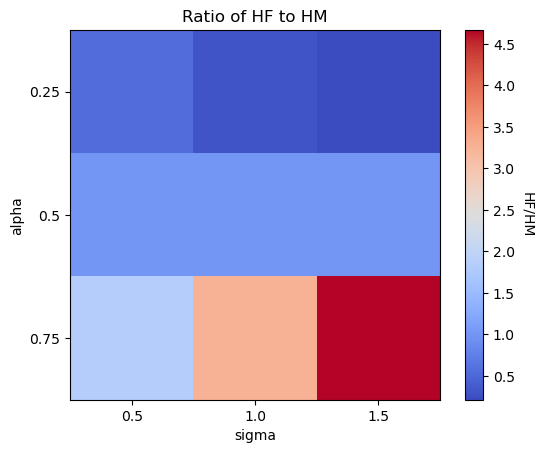

In [28]:

# initialize model
model = HouseholdSpecializationModelClass()

# values of alpha and sigma to investigate
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# initialize array to store ratios
ratios = np.zeros((len(alpha_vals), len(sigma_vals)))

# loop over alpha and sigma values
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        
        # set alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve the model
        opt = model.solve_discrete()
        
        # calculate ratio
        ratio = opt.HF / opt.HM
        ratios[i, j] = ratio

# plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(ratios, cmap='coolwarm')

# set tick labels
ax.set_xticks(np.arange(len(sigma_vals)))
ax.set_yticks(np.arange(len(alpha_vals)))
ax.set_xticklabels(sigma_vals)
ax.set_yticklabels(alpha_vals)

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('HF/HM', rotation=-90, va="bottom")

# add axis labels
ax.set_xlabel('sigma')
ax.set_ylabel('alpha')

# set title
ax.set_title('Ratio of HF to HM')


The resulting illustration is a heatmap that shows the ratio of female-to-male household production (HF/HM) for different values of alpha and sigma. By analyzing the heatmap, is possible to observe that for higher values of sigma when alpha = 0.75, the ratio of HF (female household production) to HM (male household production) is higher. This means that female household production is relatively more important in these cases. On the other hand, for lower values of alpha, the ratio of HF to HM is lower, indicating that male household production is relatively more important, with changes in sigma being insignificant when alpha = 0.5 and an increase in sigma decreases HF/HM ratio when alpha = 0.25.

# Question 2

Explain your code and procedure

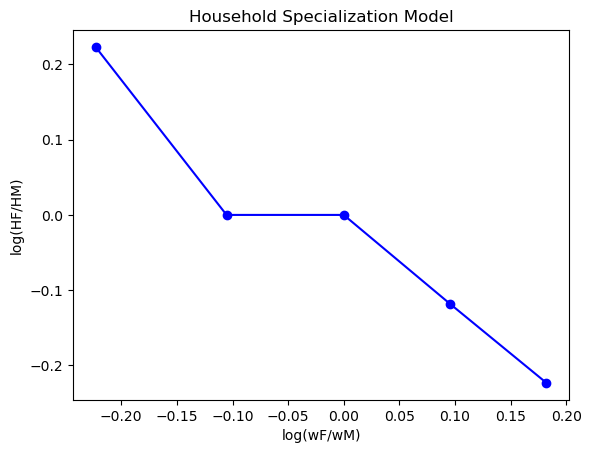

In [29]:
# To plot $\log\frac{H_{F}}{H_{M}}$ against $\log\frac{w_{F}}{w_{M}}$ for $w_{F}\in[0.8,0.9,1.0,1.1,1.2]$, 
#we first need to solve the model for each value of $w_F$ in the range. We can do this using the solve_wF_vec method of 
#the HouseholdSpecializationModelClass as follows with the discrete parameter set to true:

model = HouseholdSpecializationModelClass()

# set wF_vec
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# solve model for each value of wF
model.solve_wF_vec(discrete=True)

# calculate log(HF/HM) and log(wF/wM)
log_HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wFwM = np.log(model.par.wF_vec/model.par.wM)

# create plot
plt.plot(log_wFwM, log_HFHM, 'bo-')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.title('Household Specialization Model')
plt.show()

# Question 3

Explain your code and procedure

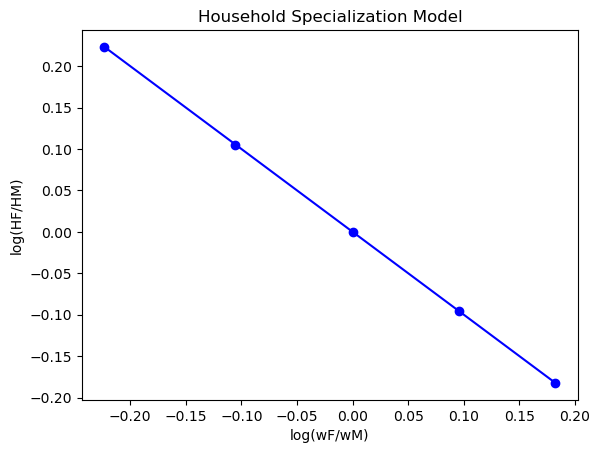

In [30]:
# To plot $\log\frac{H_{F}}{H_{M}}$ against $\log\frac{w_{F}}{w_{M}}$ for $w_{F}\in[0.8,0.9,1.0,1.1,1.2]$, 
#we first need to solve the model for each value of $w_F$ in the range. We can do this using the solve_wF_vec method of 
#the HouseholdSpecializationModelClass as follows with the discrete parameter set to false, so the model will be solved using 
#the continuous method:
# create model instance
model = HouseholdSpecializationModelClass()

# set wF_vec
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# solve model for each value of wF
model.solve_wF_vec(discrete=False)

# calculate log(HF/HM) and log(wF/wM)
log_HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wFwM = np.log(model.par.wF_vec/model.par.wM)

# create plot
plt.plot(log_wFwM, log_HFHM, 'bo-')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.title('Household Specialization Model')
plt.show()


When discrete=False, the solve_wF_vec method solves the model for a continuous range of values of wF, rather than a discrete set of values. This results in a smoother curve in the plot, when comparing to the previous plot.

# Question 4

In [60]:
model = HouseholdSpecializationModelClass()
model.par.alpha = 0.9822
model.par.sigma = 0.1

In [61]:
model.solve_wF_vec()
model.run_regression()
print(f'{model.sol.beta0:8.9f}',  f'{model.sol.beta1:8.9f}')

c:\Users\alast\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


0.401059526 -0.100000089


In [62]:
def obj(x):
    model.par.alpha = x[0]
    model.par.sigma = x[1]
    model.solve_wF_vec()
    model.run_regression()
    beta0_hat = model.sol.beta0
    beta1_hat = model.sol.beta1
    return (0.4 - beta0_hat)**2 + (-0.1 - beta1_hat)**2 
    

In [64]:
bounds = optimize.Bounds([0,0], [1,1])
res = optimize.minimize(obj, (0.98,0.1), method='trust-constr')
print(res.x)

c:\Users\alast\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\alast\OneDrive\Documents\Uni\22-23 Copenhagen\Introduction to Programming\projects-2023-it-hurts-when-ip\inauguralproject\inauguralproject.py:61: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\alast\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
 

[0.98069892 0.10167387]


In [65]:
model.par.alpha = res.x[0]
model.par.sigma = res.x[1]
model.solve_wF_vec()
model.run_regression()

print(model.sol.beta0, model.sol.beta1)

0.3993854259434733 -0.10167338635111176


In [66]:
newmodel = HouseholdSpecializationModelClass()
newmodel.par.alpha = res.x[0]
newmodel.par.sigma = res.x[1]

newmodel.solve_wF_vec()
newmodel.run_regression()

print(newmodel.sol.beta0, newmodel.sol.beta1)

0.3993854259434733 -0.10167338635111176


# Question 5

In [ ]:
#code

ADD CONCISE CONLUSION.